In [1]:
import numpy as np
from math import log, e as E
from numpy import matrix, array
from random import shuffle
import matplotlib.pyplot as plt

In [2]:
sigmoid = lambda z : 1. / (1. + E ** (-z))
EPS = 1e-8

In [3]:
trainSet = ([(0., 0.), (1., 0.), (0., 1.), (1., 1.)],
            [ 0.,       1.,       1.,       1.])

In [4]:
class Neural:
    def __init__ (self, n):
        self.w = matrix([0.] * n).T ###shape=(n,1)
        self.size = n
    def __call__ (self, x): ###x:col vector, augmented vector
        return sigmoid((self.w.T * x)[0,0])
    def parDiff (self, x, i, value): ###partial differential
        w = self.w.copy()
        w[i, 0] += EPS
        return sigmoid((w.T * x)[0,0]) - value
    def parDeri (self, x, value): ###partial derivative
        return matrix([self.parDiff(x, i, value) / EPS for i in range(self.size)]).T
    def desc (self, par):
        self.w -= par

In [5]:
class Lost:
    def __init__ (self): pass
    def __call__ (self, ys, yhs): ###ys, yh : shape=(n,)
        return sum([-yh * log(y) - (1 - yh) * log(1 - y) for y, yh in zip(ys, yhs)])
    def parDiff (self, ys, yhs, i, value): ###partial differential
        ys2 = ys.copy()
        if ys2[i] < 0.5: ### y' = y + EPS > 1 => (1 - y') < 0
            ys2[i] += EPS
            return self(ys2, yhs) - value
        ys2[i] -= EPS
        return value - self(ys2, yhs)
    def parDeri (self, ys, yhs, value): ###partial derivative
        return [self.parDiff(ys,yhs,i, value) / EPS for i in range(min(len(ys),len(yhs)))]

In [6]:
1/ array([1,2,3])

In [7]:
iterations = 10
learningRate = 1.

n = 3 ###number of args
ts = [*zip(*trainSet)]
neur = Neural(n)

losts = []
sumParSquare = matrix([EPS] * n).T ###adagrad
for i in range(iterations):
    shuffle (ts)
    lostFunc = Lost()
    for x, yh in ts:
        x = matrix([*x, 1]).T
        yhs = [yh]
        y = neur(x)
        #print(y)
        lost = lostFunc([y], yhs)
        par = neur.parDeri(x, y) * lostFunc.parDeri([y], yhs, lost)[0]
        sumParSquare += matrix(par.A ** 2) ###adagrad
        adagrad = matrix(np.diag((1. / sumParSquare.A ** 0.5).T.tolist()[0]))###adagrad
        #print (adagrad, par)
        neur.desc(learningRate * adagrad * par) ###gradient descent
    ys = [neur(matrix([*x, 1]).T) for x in trainSet[0]]
    
    lost = lostFunc(ys, trainSet[1])
    losts += [lost]
    #print ('--')

print (neur.w)
ys = [neur(matrix([*x, 1]).T) for x in trainSet[0]]
lost = lostFunc(ys, trainSet[1])
print (ys, lost)

plt.plot(range(iterations), losts);

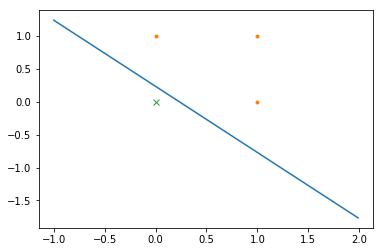

In [8]:
w1, w2, w3 = neur.w.T.tolist()[0]
x = array(range(-100, 200))/ 100
y = -w1 * x / w2 - w3 / w2

plt.plot(x, y, '-');
plt.plot([0,1,1],[1,0,1],'.');
plt.plot([0],[0],'x');